# Introducere in transfer learning

Toate retelele neuronae prezentate au fost elaborate de la zero si au urmat procedul de invatare, insa drept rezultata s-a constata ca mai este loc de imbunatatire a preformantelor.

Pentru a imbunatati pernormatele urmaeza sa fie incercate diferite configuratii ale retelei, adaugarea de noi nivele, modificarea rate learning, ajustarea nuarului de neuroni si alte

Taote acestea consuma timp.

Pentru a salva timpu se utilizeaza o tehnica numita **transfer learning**, adica se utilizeaza un alt model ce a fost pregatit pentru o alta probelma si se adapteaza la problema proprie.

Utilizarea transferlearning are 2 beneficii:
1. Se poate imprumuta arhitectura retelei neuronare existente care a fost demonstrat ca functioneaza perfect la probleme similare
2. Se poate imprumuta arhitectura unei retele care lucreaza si care a invatat deja legitatile pe date simulare. Drept rezultat se obtin rezultate mult mai bune pe datele proprii

Exita diferite tipuri de **transfer learning**:

1. **Transfer learning "asa cum este"** atunci cand tu ei un model asa cum este el dupa ce a trecut procedura de training si il utilizezi in cadrul sarcinii tale fara nici o modificare. 

  * Exemplu de acest tip de transfer learning sunt modelele computer vision care au realizat procedura de training pe setul de date ImageNet ce contine 1000 clase cu imagini. Daca se aplica o imagine unui astfel de model atunci acesta va prezice probabilitatea aflarii imaginii in fiecare dintre cele 1000 de clase. 

    * Acest model nu poate fi utilizat atunci cand se dorecte clasificare dupa un alt numar de clase (de exemplu 10 clase). Toate modelel din TensorFlow Hub ce au in denumirea lor `"/classification"` ofera acest tip de functionalitate.

2. **Transfer leraning pentru extragerea caracteristicilor** atunci cand tu ei un model ce a trecut procedura de training si ii ajustezi iesirile conform sarcinii tale.  

  * Exemplu de acet tip de transfer learning este atunci cand ei un model ce contine 236 nivele diferite care a trecut procedura de training pe setul ImageNet si nivelul de iesire contine 1000 de neuroni (deoarece in ImageNet sunt 1000 de clase). Pentru ajustarea la propria problema se inlatura ultimul nicel de iesire si se adauga unul ce va contine un numar de neuroni identic numarului claselor conform proprie sarcini. Partea importanta in acest caz este faptul ca **devin trainable doar hiperparametrii nivelului modificat, pentru celelalte nivele hiperparametrii rtaman inghetati**. 

    * Acest tip de tranfer learning este foarte util atunci cand datele proprii sunt similare cu datele pe care a fost realizat procedul de training a modelului.

3. **Transfer learning cu ajustarea fina** atunci cand tu ei un model ce a trecut procedura de training si ajustezi hiperparametrii acestuia la propriai problema. 

  * De obicei aces lucru inseamna training-ul **unora, mai multor sau a tuturor** nivelelor modelului ce a trecut deja procedura de training. 

    * Acest lucru este util atunci cand avem un set mare date ( 100+ imagini pe clasa) si aceste datesunt un pic diferite de datele pe care s-a realizat trainingul modelului.

De obicei implimentarea transfer learning urmeaza pasii:
- Se ingheata toate nivelele de inceput a modelului ce a trecut procedura de training si acestea devin untrainable.
- Se dezgheta ultimele 2-3 nivele si se ajusteaza iesirile la propria problema (extragerea caracteristicielor)
- In trepte se dezgheaza si alte nivele si se realizareaa procedura de training prin ajustarea fina a hiperparametrilor modelului. 

> 🤔 **Question:** *Why train only the top 2-3 layers in feature extraction?*


![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/04-different-kinds-of-transfer-learning.png)


# Activarea GPU

In [2]:
# Verificarea utilizarii GPU
!nvidia-smi

Sun Oct 31 10:08:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Conectatea GPU urmand cale Executie(Runtime) -> Shimbati tipul executie (Change Runtime Type) -> Accelerator hardware si selectate "GPU" (Hardware Accelerator and select "GPU").

In [3]:
# Verificare repetata a utilizarii GPU
!nvidia-smi

Sun Oct 31 10:08:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Utilizarea doar a 10% din date pentru rapiditate

Pentru a reduce timpul de setare a retelei neuronale se va reduce volumul datelor de training la 10% si se vor analiza performantele retelei. Dupa ce modelul atnge performante maxime pe volumul mic de date de training se poate trece la invatarea retelei pe intregul volum

Se va importa acum doar 10% din datele de trainig "10_food_classes" si intregul set al datelor de test

In [4]:
# Obtinera datelor (10% din datele de training)
import zipfile

# Descarcarea datelor
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Dezarhivarea datelor descarcate
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-31 10:08:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 64.233.183.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   169MB/s    in 1.0s    

2021-10-31 10:08:14 (169 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
# Verificarea structurii folderului descarcat
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In folderele de training sunt doar 75 de imagini in locul celor 750

# Procesarea datelor

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Imagnini de training:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Imagnini de test:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Imagnini de training:
Found 750 images belonging to 10 classes.
Imagnini de test:
Found 2500 images belonging to 10 classes.


# Setarea callback

[Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) este o functionalitatea aditionala care poate fi adaugata modelului pe durata sau dupa procedsul de training.

Cele mai populare callback-uri sunt:
* [**Urmărirea experimentelor cu TensorBoard**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - inregistreaza performantele mai multor modele si apoi le vizualizeaza spre comparare vizuala intr-un  [TensorBoard](https://www.tensorflow.org/tensorboard) ( un tablou pentru inspectarea parametrilor retelei neuronale). Este util pentru compararea rezultatelor diferitor modele .
* [**Puncte de control a modelului**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - salveaza modelul in procesul de training si deci poate fi stopat la nevoie si apoi se poate reveni si continuat din punctul la care a ramas. Este util cand procesul de training este foarte lung.  
* [**Stoparea timpurie**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - permite oprirea automata a procesului de training atunci cand preformantele sistenului inceteaza a mai creste. Este util cand setul de date de training este foarte mare si nu se sti cat va dura procesul de training.

In continuare se va analiza callback-ul TensorBoard.

Callback-ul TensorBoard poate fi acesat utilizand [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard). 

Functi sa de baza este salvarea indicatorilor metrici de performanta in procesul de training al modelului in folderul pecificat cu parametrul  `log_dir`.

Implicit, inregistrarea are loc dupa fiecare epoch, adica parametrul `update_freq='epoch'`.

In continuare se va defini o functie de crea a callback-ului TensorBoard

In [7]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir )

  print(f"Fisierele de inregistrarea TensorBoard se salveaza in : {log_dir}")
  return tensorboard_callback

# Crearea modelului utilizandu-se TensorFlow Hub

## Teorie referitoarea la TensorFlow Hub

Pina acum am elaborat toate modelele de la zero, iar in continuarea modelele vor fi importate din TensorFlow Hub.

[TensorFlow Hub](https://tfhub.dev/) este un epozit cu diferite componente a diferitor modele. Acesta permite importarea si utilizarea modelelor ce au trecut procedura de training prin intermediul unui URL.

In continuare vom utiliza doar doua modele din  TensorFlow Hub:
1. [ResNetV2](https://arxiv.org/abs/1603.05027) - modele cu arhitectura pentru  computer vision din 2016.
2. [EfficientNet](https://arxiv.org/abs/1905.11946) - modele cu arhitectura pentru  computer vision din 2019.

Ambele modele au obtinut o eroare foarte mica pe setul de imagini [ImageNet (ILSVRC-2012-CLS)](http://www.image-net.org/), un criteriu standard in ramura computer vision.

Pentru a gasi aceste modele se vor parcurge pasii:

1. Se acceseza [tfhub.dev](https://tfhub.dev/).
2. Se alege domeniul proglemie, de "Image" .
3. Se selecteaza verisunea TF, in cazul nostru TF2.
4. Se inlatura toate filtrele "Problem domanin" lasandu-se doar cele a problemelor asupra carora se lucreaza. 
  * **Nota:** "Image feature vector" poate fi utilizat impreuna cu oricarea din probleme de aceea se lasa si acest fitru.
5. Toate modelel listate sunt posibile modele ce pot fi utilizate.

Pentru a alege cel mai bun model se poate accesa [paperswithcode.com](https://www.paperswithcode.com), o resursa cu articole unse se prezinta rezultatele implementarii ultimelor modele. Intrucat in cazul dat se lucreaza cu imagnini se verifica [modelele ce au obtinut cele mai bune rezulatea pe ](https://paperswithcode.com/sota/image-classification-on-imagenet).

6. Se selecteaza tab-ul Architecture in TensorFlow Hub se apare un meniu dropdown menu cu numele arhitecturilor. 
  * Ideea generala aici e cacu cat e mai marea numarul din  numele arhitectuiri cu atat aceasta arhitectura a obtinut rezultate mai bune, de exemplu EfficientNetB4 peste ami buna decat EfficientNetB0.
    * Cu toate acestea, compromisul cu numere mai mari poate însemna că acestea au un timp mai lung pentru training. 
7. Se selecteaza EfficientNetB0 si va aparaea o [fereastra de tipul] (https://tfhub.dev/s?module-type=image-classification,image-feature-vector&network-architecture=efficientnet-b0&tf-version=tf2):
![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/04-tensorflow-hub-efficientnetb0.png)
 * Incepind cu august 2021 este accesibila si versiunea [EfficientNet V2](https://tfhub.dev/google/collections/efficientnet_v2/1). 
8. Se activeaza titlul "[efficientnet/b0/feature-vector](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1)" si se deschide o pagina ce va contine butonul  "Copy URL". Acest URL va permite importul modelului EfficientNetB0.
  * Daca se selecteaza versiunea EfficientNet V2 atunci se activa titlul [imagenet/efficientnet_v2_imagenet1k_b0/feature_vector](https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2)
  * Copierea adresei URL ar trebui să dea ceva de genul acesta: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

## Crearea functiilor ajutatoare

In [8]:
# importul bomponentelor necesare
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

Acum cand au fost copiate adresle URL catre arhitecturile [EfficientNetB0 (2019)](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1), [ResNetV250 (2016)](https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4) si [EfficientNetB0_V2 (2021)](https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2) se vor implementa acestea asupra datelor si se vor compara rezultatele.



In [9]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

#  EfficientNetB0 feature vector 
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# EfficientNetB0v2 feature vector 
efficientnetv2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

Pentru importul modelelor se va utiliza modlul [`KerasLayer()`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer) din TensorFlow Hub iar unul din parametri va fi adresa url a modelului

Se elaboreaza o functie de creare a modelului deaorece va trebuie sa se creeea acet model pentru cele 3 arhitecturi

In [10]:
def create_model(model_url, num_classes=10):
  """
  Creaza un model Keras Sequential dupa url-ul TensorFlow Hub
  """
  # descarcarea modelului si salvarea sa ca un nivel Keras
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False, # se ingheata nivelele
                                           name = 'Nivelul_extragere_caracteristici', # numele nivelului pentru analiza
                                           input_shape = IMAGE_SHAPE+(3,)) # definirea formei intrarilor
  #crearea modelului propriu
  model = tf.keras.Sequential([
                               feature_extractor_layer, # utilizarea nivelului importat din tensorFlow Hub
                               layers.Dense(num_classes, activation='softmax', name = "Nivel_de_iesire") # crearea nivelului propriu de iesire
  ])

  # compilarea modelului propriu
  model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
  return model

Se creaza o functie ce va permite afisarea separate a curbei perderilor si a acuratetei modelului pe datele de training si pe datele de test

In [11]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Afisarea pierderilor
  plt.plot(epochs, loss, label="Pierderile de training")
  plt.plot(epochs, val_loss, label='Pierderile de test')
  plt.title('Pierderile')
  plt.xlabel('Epochs')
  plt.legend()

  # afisarea cacuratetei
  plt.figure()
  plt.plot(epochs, accuracy, label="Acuratetea de training")
  plt.plot(epochs, val_accuracy, label='Acuratetea de test')
  plt.title('Acuratetea')
  plt.xlabel('Epochs')
  plt.legend();



## Crearea modelului dupa arhitectura ResNetV250

Crearea prorpiului model conform arhitecturii [ResNetV250 (2016)](https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4)

In [12]:
# crearea modelului resnet
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

In [13]:
# Implementarea modelului resnet
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  # se creaza un callback tensorBoard pentru model
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", # folderul unde se va salva datele inregistrate
                                                                           experiment_name="resnet50V2")]) # numele fiserului 

Fisierele de inregistrarea TensorBoard se salveaza in : tensorflow_hub/resnet50V2/20211031-100829
Epoch 1/5
24/24 [==============================] - 58s 1s/step - loss: 2.0794 - accuracy: 0.3333 - val_loss: 1.2580 - val_accuracy: 0.6056
Epoch 2/5
24/24 [==============================] - 21s 906ms/step - loss: 0.9585 - accuracy: 0.7147 - val_loss: 0.8900 - val_accuracy: 0.7160
Epoch 3/5
24/24 [==============================] - 21s 908ms/step - loss: 0.6530 - accuracy: 0.8067 - val_loss: 0.7491 - val_accuracy: 0.7728
Epoch 4/5
24/24 [==============================] - 21s 908ms/step - loss: 0.4987 - accuracy: 0.8667 - val_loss: 0.7073 - val_accuracy: 0.7792
Epoch 5/5
24/24 [==============================] - 21s 911ms/step - loss: 0.4050 - accuracy: 0.9107 - val_loss: 0.6816 - val_accuracy: 0.7824


Modelul `resnet_model` asigura o acuratete de 91% pe datele de training si de 78% pe datele de test dupa doar 5 epochs si doar pe baza a 10 % din datele de training

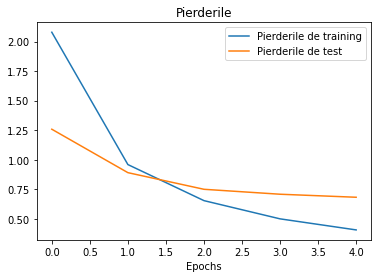

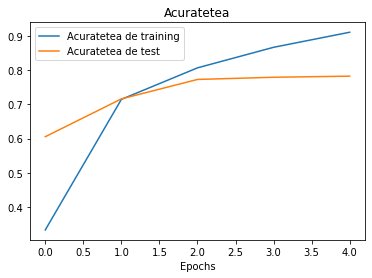

In [14]:
# afisarea curebelor pierderilor si a acuratetei
plot_loss_curves(resnet_history)

In [15]:
# Coomponenta modelului `resnet_model` 
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Nivelul_extragere_caracteris (None, 2048)              23564800  
_________________________________________________________________
Nivel_de_iesire (Dense)      (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


## Crearea modelului dupa arhitectura EfficientNetB0

Crearea prorpiului model conform arhitecturii [EfficientNetB0 (2019)](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1)

In [16]:
# crearea modelului EfficientNet
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_10_percent.num_classes)

In [17]:
# Implementarea modelului efficientnnet
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs = 5,
                                              steps_per_epoch = len(train_data_10_percent),
                                              validation_data = test_data,
                                              validation_steps = len(test_data),
                                              # se creaza un callback tensorBoard pentru model
                                              callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", # folderul unde se va salva datele inregistrate
                                                                                       experiment_name="efficientnetb0")]) # numele fiserului 

Fisierele de inregistrarea TensorBoard se salveaza in : tensorflow_hub/efficientnetb0/20211031-101108
Epoch 1/5
24/24 [==============================] - 34s 997ms/step - loss: 1.9012 - accuracy: 0.3947 - val_loss: 1.3288 - val_accuracy: 0.7156
Epoch 2/5
24/24 [==============================] - 19s 812ms/step - loss: 1.0737 - accuracy: 0.7680 - val_loss: 0.8732 - val_accuracy: 0.8168
Epoch 3/5
24/24 [==============================] - 19s 803ms/step - loss: 0.7643 - accuracy: 0.8280 - val_loss: 0.6979 - val_accuracy: 0.8444
Epoch 4/5
24/24 [==============================] - 19s 805ms/step - loss: 0.6118 - accuracy: 0.8680 - val_loss: 0.6087 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 19s 809ms/step - loss: 0.5186 - accuracy: 0.8907 - val_loss: 0.5551 - val_accuracy: 0.8620


Modelul `efficientnet_model` asigura o acuratete de 88% pe datele de training si de 86% pe datele de test dupa doar 5 epochs si doar pe baza a 10 % din datele de training

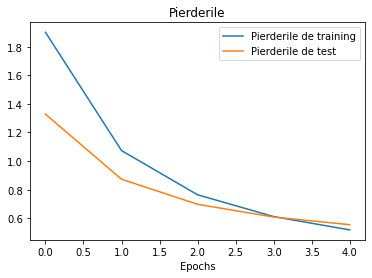

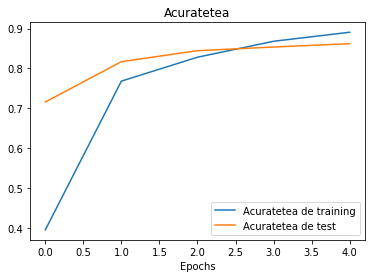

In [18]:
# afisarea curebelor pierderilor si a acuratetei
plot_loss_curves(efficientnet_history)

In [19]:
# Componenta modelului `efficientnet_model` 
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Nivelul_extragere_caracteris (None, 1280)              4049564   
_________________________________________________________________
Nivel_de_iesire (Dense)      (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


## Crearea modelului dupa arhitectura EfficientNetB0V2

Crearea prorpiului model conform arhitecturii [EfficientNetB0_V2 (2021)](https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2)

In [20]:
# crearea modelului EfficientNetv2
efficientnetv2_model = create_model(efficientnetv2_url, num_classes=train_data_10_percent.num_classes)

In [21]:
# Implementarea modelului efficientnnetv2
efficientnetv2_history = efficientnetv2_model.fit(train_data_10_percent,
                                                  epochs = 5,
                                                  steps_per_epoch = len(train_data_10_percent),
                                                  validation_data = test_data,
                                                  validation_steps = len(test_data),
                                                  # se creaza un callback tensorBoard pentru model
                                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", # folderul unde se va salva datele inregistrate
                                                                                       experiment_name="efficientnetb0v2")]) # numele fiserului

Fisierele de inregistrarea TensorBoard se salveaza in : tensorflow_hub/efficientnetb0v2/20211031-101308
Epoch 1/5
24/24 [==============================] - 29s 930ms/step - loss: 2.0526 - accuracy: 0.3067 - val_loss: 1.5743 - val_accuracy: 0.5728
Epoch 2/5
24/24 [==============================] - 19s 802ms/step - loss: 1.3526 - accuracy: 0.6520 - val_loss: 1.1585 - val_accuracy: 0.6904
Epoch 3/5
24/24 [==============================] - 19s 798ms/step - loss: 1.0300 - accuracy: 0.7480 - val_loss: 0.9714 - val_accuracy: 0.7252
Epoch 4/5
24/24 [==============================] - 19s 804ms/step - loss: 0.8579 - accuracy: 0.8013 - val_loss: 0.8716 - val_accuracy: 0.7476
Epoch 5/5
24/24 [==============================] - 19s 798ms/step - loss: 0.7486 - accuracy: 0.8187 - val_loss: 0.8077 - val_accuracy: 0.7612


Modelul efficientnetv2_model asigura o acuratete de 83% pe datele de training si de 77% pe datele de test dupa doar 5 epochs si doar pe baza a 10 % din datele de training

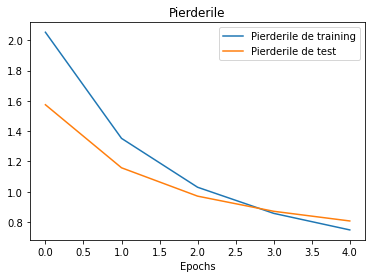

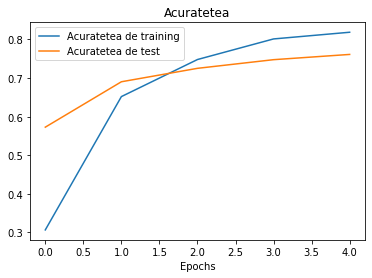

In [22]:
# afisarea curebelor pierderilor si a acuratetei
plot_loss_curves(efficientnetv2_history)

In [23]:
# Componenta modelului `efficientnetv2_model` 
efficientnetv2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Nivelul_extragere_caracteris (None, 1280)              5919312   
_________________________________________________________________
Nivel_de_iesire (Dense)      (None, 10)                12810     
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


# Compararea modelelor utilizand TensorBoard

In cazul modelelor anterioare s-a putut analiza performantele separate a le acestora prin intermediul curbei perderilor dar pentru analiza comparativa a mai multor modele se va utiliza un instrument numit [TensorBoard](https://www.tensorflow.org/tensorboard).

Odata cu utilizarea coalback-ului TensorBoard toate datele modelelor a u fost salvate in fisierele specificate, iar pentru vizualizarea acestora este necesara incarcarea lor pe site-ul [TensorBoard.dev](https://tensorboard.dev/).

## Incarcarea datelor experimentelor in TensorBoard

Pentru a incarca datele inregistrate de callback in TTensorBoard se va utliza comanda:
```
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \ 
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \ 
  --one_shot
```
unde:
* `--logdir` este directoriu unde au fost salvate inregistrarile
* `--name` numele experimentului 
* `--description` o scurta descriere a experimentului
* `--one_shot` iesirea din TensorBoard uploader cand incarcare s-a finisat

Execuatea comenzii `tensorboard dev upload` va necesita la inceput cheia de autorizare la incarcarea pe TensorBoard.dev. Dupa confirmarea autorizarii fisierele cu inregistrari se vor fi incarcate.

In [24]:
# Incarcarea pe TensorBoard dev
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "ResNet50V2 vs. EfficientNetB0 vs. EfficientNetB0 " \
  --description "Compararea a trei arhitecturi a modelelor TF Hub de extragere a caracteristicilor utilizand 10% din imaginile de training" \
  --one_shot

2021-10-31 10:14:56.307972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:14:56.316985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:14:56.317444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/48olr7d0TgSWlONAWYQHJA/

[2021-10-31T10:14:56] Started scanning logdir.
[2021-10-31T10:14:59] Total uploaded: 90 scalars, 0 tensors, 3 binary objects (8.4 MB)
[2021-10-31T10:14:59] Done scanning logdir.


Done. View your TensorBoard at https://tensorboar

## Afisarea experimentelor salvate in TensorBoard

De fiecare data cand se incarca ceva pe TensorBoad.dev se creaza un nou ID pentru esperiment. ID experimentului arata cam asa: https://tensorboard.dev/experiment/48olr7d0TgSWlONAWYQHJA/ .

Pentru a vedea toate experimentele incarcate se utilizeaza comada:

```tensorboard dev list```

In [26]:
#Verificarea experimentelor
!tensorboard dev list

2021-10-31 10:16:44.634327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:16:44.644069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:16:44.644544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/48olr7d0TgSWlONAWYQHJA/
	Name                 ResNet50V2 vs. EfficientNetB0 vs. EfficientNetB0 
	Description          Compararea a trei arhitecturi a modelelor TF Hub de extragere a caracteristicilor utilizand 10% din imaginile de training
	Id                   48olr7d0TgSWlONAWYQHJA
	Created            

## Stergerea experimentelor de pe TensorBoard

Toate experimentele incarcate pe TensorBoard.dev sunt publice de aceea uneori cand utilizat date confidentiale este necesara stergerea acestora dupa finisara procesului de analiza. Pentru stengere se utilizeaza comanda:


`tensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID]`

In [27]:
# Stergerea experimentului
!tensorboard dev delete --experiment_id 48olr7d0TgSWlONAWYQHJA

2021-10-31 10:19:55.117792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:19:55.126411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:19:55.126881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Deleted experiment 48olr7d0TgSWlONAWYQHJA.


In [28]:
#Verificarea daca experimentul mai exista
!tensorboard dev list

2021-10-31 10:20:14.717152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:20:14.725527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 10:20:14.725997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
No experiments. Use `tensorboard dev upload` to get started.


# 🛠 Exercises

1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction ([`mobilenet_v2_100_224/feature_vector`](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4)) from TensorFlow Hub, how does it perform compared to our other models?
2. Name 3 different image classification models on TensorFlow Hub that we haven't used.
3. Build a model to classify images of two different things you've taken photos of.
  * You can use any feature extraction layer from TensorFlow Hub you like for this.
  * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.
4. What is the current best performing model on ImageNet?
  * Hint: you might want to check [sotabench.com](https://www.sotabench.com) for this.

# 📖 Extra-curriculum

* Read through the [TensorFlow Transfer Learning Guide](https://www.tensorflow.org/tutorials/images/transfer_learning) and define the main two types of transfer learning in your own words.
* Go through the [Transfer Learning with TensorFlow Hub tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub) on the TensorFlow website and rewrite all of the code yourself into a new Google Colab notebook making comments about what each step does along the way.
* We haven't covered fine-tuning with TensorFlow Hub in this notebook, but if you'd like to know more, go through the [fine-tuning a TensorFlow Hub model tutorial](https://www.tensorflow.org/hub/tf2_saved_model#fine-tuning) on the TensorFlow homepage.How to fine-tune a tensorflow hub model:  
* Look into [experiment tracking with Weights & Biases](https://www.wandb.com/experiment-tracking), how could you integrate it with our existing TensorBoard logs?